In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
train=pd.read_csv('train.csv')

In [289]:
train.shape

(891, 12)

In [290]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

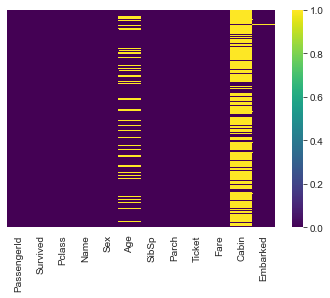

In [291]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

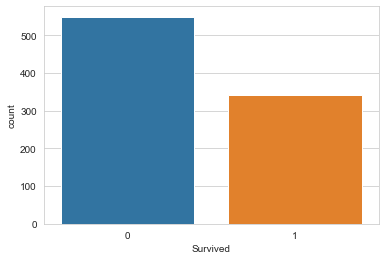

In [292]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

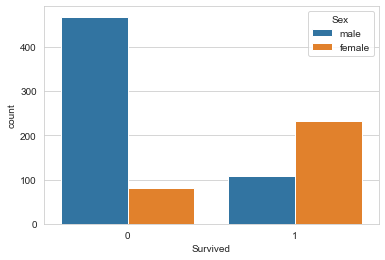

In [293]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

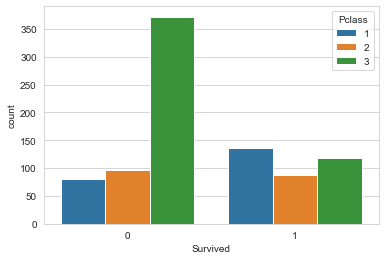

In [294]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

c:\users\r.k choudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

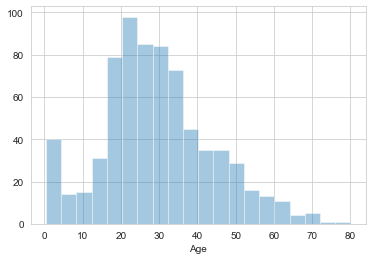

In [295]:
sns.distplot(train['Age'].dropna(),kde=False)

<AxesSubplot:>

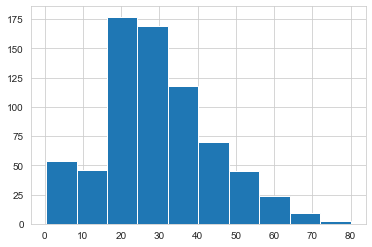

In [296]:
train['Age'].dropna().hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

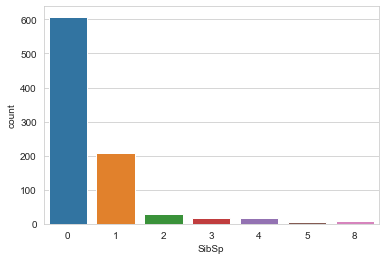

In [297]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

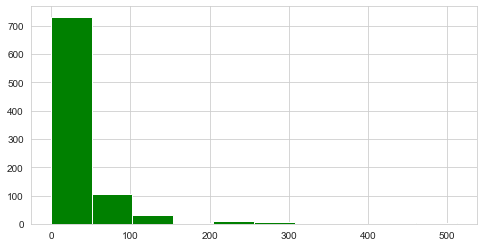

In [298]:
train['Fare'].hist(color='green', figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

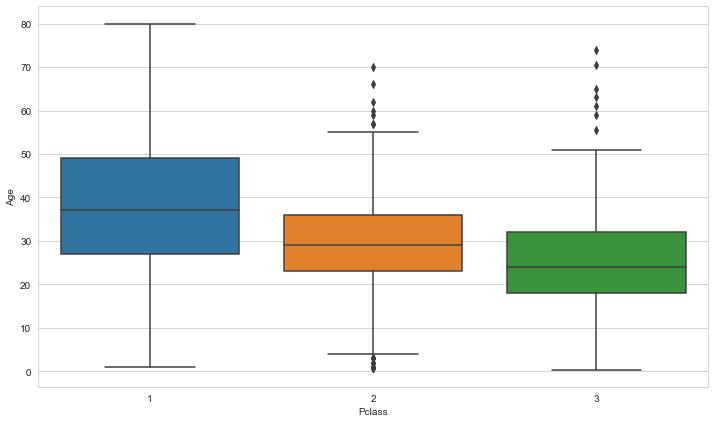

In [299]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [300]:
def compute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else :
            return 24
    else :
        return age

In [301]:
train['Age']=train[['Age','Pclass']].apply(compute_age,axis=1)

<AxesSubplot:>

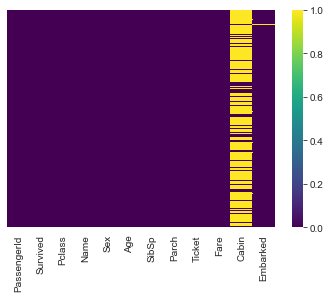

In [302]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [303]:
train.drop('Cabin',axis=1, inplace=True)

In [304]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [305]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)


In [306]:
train.drop(['PassengerId','Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [307]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [308]:
train=pd.concat([train,sex,embark],axis=1)

In [309]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [311]:
y_train=train['Survived']
x_train=train.drop('Survived',axis=1)

In [312]:
x_tr,x_te,y_tr,y_te=train_test_split(x_train,y_train,random_state=1)

In [313]:
model=RandomForestClassifier(random_state=1)
model.fit(x_tr,y_tr)

RandomForestClassifier(random_state=1)

In [314]:
pred=model.predict(x_te)

In [315]:
pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [316]:
acc=accuracy_score(pred,y_te)
print(acc*100)

76.68161434977578


In [317]:
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [318]:
test=pd.read_csv('test.csv')

In [319]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [320]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [321]:
test['Fare'].fillna(test.Fare.mean(), inplace=True)

In [322]:
test.drop('Cabin',axis=1, inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

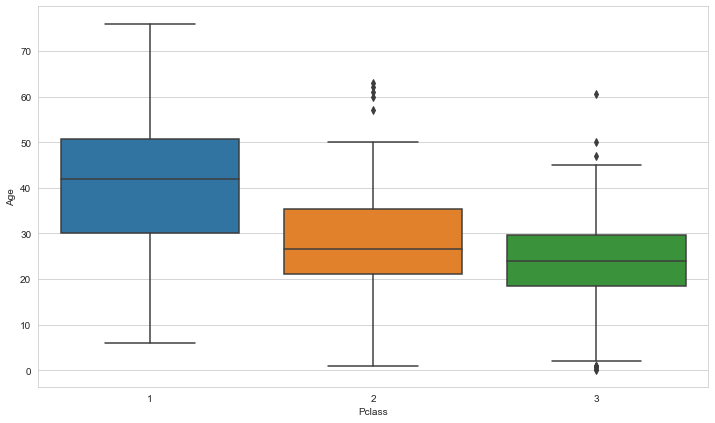

In [323]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=test)

In [324]:
def computeage2(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 42
        elif pclass==2:
            return 28
        else :
            return 25
    else :
        return age

In [325]:
test['Age']=test[['Age','Pclass']].apply(computeage2,axis=1)

In [326]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [327]:
embark2=pd.get_dummies(test['Embarked'],drop_first=True)

In [328]:
sex2=pd.get_dummies(test['Sex'],drop_first=True)

In [329]:
Id=test['PassengerId']

In [330]:
test.drop(['PassengerId','Sex','Embarked','Ticket','Name'],axis=1, inplace=True)

In [331]:
test=pd.concat([test,embark2,sex2],axis=1)

In [332]:
test

,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,0,1,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,0,1,1
416,3,25.0,0,0,8.0500,0,1,1


In [333]:
data_model=RandomForestClassifier(random_state=1)

In [334]:
data_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [335]:
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [336]:
data_predict=data_model.predict(test)

In [337]:
data_predict

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

In [338]:
output=pd.DataFrame({'PassengerId':Id  ,'Survived':data_predict})
output.to_csv('my_submission.csv',index=False)

In [339]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
